In [1]:
import mplfinance as mpf
import requests
import pandas as pd
import re
import time


import plotly.graph_objects as go
import plotly.subplots as ms
import talib
import matplotlib.pyplot as plt     # 점찍기용


import matplotlib.pyplot as plt    # 히트맵용
import seaborn as sns              # 히트맵용
import numpy as np
from pandas import Series, DataFrame

In [2]:
test1 = pd.read_csv('030210.KS.csv', encoding='cp949')
test1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,3960.0,3980.0,3570.0,3625.0,2938.579102,1991741
1,2018-01-03,3655.0,3755.0,3595.0,3715.0,3011.537109,1497801
2,2018-01-04,3745.0,3885.0,3705.0,3710.0,3007.484131,999895
3,2018-01-05,3720.0,3975.0,3680.0,3910.0,3169.612793,1005973
4,2018-01-08,3920.0,4025.0,3895.0,3965.0,3214.197998,638284
...,...,...,...,...,...,...,...
1307,2023-04-24,5060.0,5150.0,3630.0,3630.0,3630.000000,4981123
1308,2023-04-25,3000.0,3295.0,2875.0,3270.0,3270.000000,40789914
1309,2023-04-26,3170.0,3370.0,3105.0,3110.0,3110.000000,8537890
1310,2023-04-27,3100.0,3165.0,2970.0,3020.0,3020.000000,4060047


In [3]:
# date, close, volume만 남기기

test1 = test1[['Date', 'Close', 'Volume']]
test1

,Date,Close,Volume
0,2018-01-02,3625.0,1991741
1,2018-01-03,3715.0,1497801
2,2018-01-04,3710.0,999895
3,2018-01-05,3910.0,1005973
4,2018-01-08,3965.0,638284
...,...,...,...
1307,2023-04-24,3630.0,4981123
1308,2023-04-25,3270.0,40789914
1309,2023-04-26,3110.0,8537890
1310,2023-04-27,3020.0,4060047


In [4]:
test2 = pd.read_csv('게시글_030210.csv', encoding='cp949')
test2

,날짜,게시글
0,2017-06-08,1
1,2017-06-09,6
2,2017-06-10,2
3,2017-06-13,5
4,2017-06-14,2
...,...,...
1441,2023-04-27,146
1442,2023-04-28,179
1443,2023-04-29,21
1444,2023-04-30,18


In [5]:
test1.index = pd.DatetimeIndex(test1['Date'])
test1

,Date,Close,Volume
Date,,,
2018-01-02,2018-01-02,3625.0,1991741
2018-01-03,2018-01-03,3715.0,1497801
2018-01-04,2018-01-04,3710.0,999895
2018-01-05,2018-01-05,3910.0,1005973
2018-01-08,2018-01-08,3965.0,638284
...,...,...,...
2023-04-24,2023-04-24,3630.0,4981123
2023-04-25,2023-04-25,3270.0,40789914
2023-04-26,2023-04-26,3110.0,8537890


In [6]:
test2.index = pd.DatetimeIndex(test2['날짜'])
test2

,날짜,게시글
날짜,,
2017-06-08,2017-06-08,1
2017-06-09,2017-06-09,6
2017-06-10,2017-06-10,2
2017-06-13,2017-06-13,5
2017-06-14,2017-06-14,2
...,...,...
2023-04-27,2023-04-27,146
2023-04-28,2023-04-28,179
2023-04-29,2023-04-29,21


In [7]:
# https://ddaaadd.tistory.com/154

m = test1.join(test2)

m

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,3625.0,1991741,2018-01-02,38.0
2018-01-03,2018-01-03,3715.0,1497801,2018-01-03,15.0
2018-01-04,2018-01-04,3710.0,999895,2018-01-04,5.0
2018-01-05,2018-01-05,3910.0,1005973,2018-01-05,7.0
2018-01-08,2018-01-08,3965.0,638284,NaN,NaN
...,...,...,...,...,...
2023-04-24,2023-04-24,3630.0,4981123,2023-04-24,227.0
2023-04-25,2023-04-25,3270.0,40789914,2023-04-25,449.0
2023-04-26,2023-04-26,3110.0,8537890,2023-04-26,161.0


In [8]:
m.head(20)

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,3625.0,1991741,2018-01-02,38.0
2018-01-03,2018-01-03,3715.0,1497801,2018-01-03,15.0
2018-01-04,2018-01-04,3710.0,999895,2018-01-04,5.0
2018-01-05,2018-01-05,3910.0,1005973,2018-01-05,7.0
2018-01-08,2018-01-08,3965.0,638284,NaN,NaN
2018-01-09,2018-01-09,3885.0,509755,NaN,NaN
2018-01-10,2018-01-10,3955.0,587877,2018-01-10,2.0
2018-01-11,2018-01-11,4120.0,730162,2018-01-11,3.0
2018-01-12,2018-01-12,4250.0,2285190,2018-01-12,7.0


In [9]:
m = m.rename(columns={'날짜': 'naver_date', '게시글': 'Post'})

In [10]:
heatmap_data = m[["Close", "Volume", "Post"]]

<Axes: title={'center': '030210.KS'}>

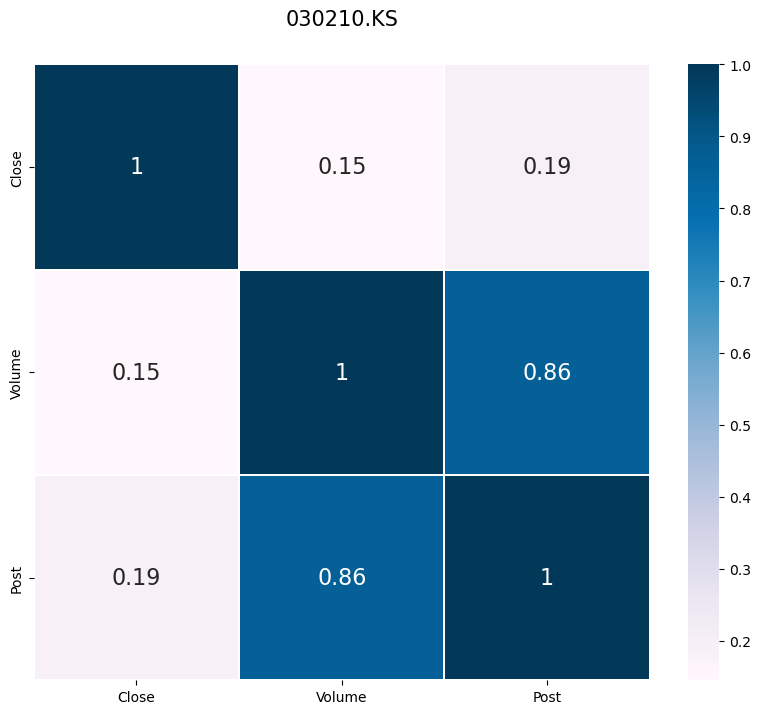

In [11]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("030210.KS", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})